In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as matplot
import numpy as np

import re
import sklearn

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

df_train = pd.read_csv('../content/Train_data.csv')
df_test = pd.read_csv('../content/Train_data.csv')

In [18]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,20,2,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,45,2,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,icmp,50,4,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,icmp,25,2,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,icmp,25,2,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [19]:
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,20,2,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,45,2,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,icmp,50,4,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,icmp,25,2,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,icmp,25,2,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [20]:
X_train = df_train.drop('xAttack', axis=1)
Y_train = df_train.loc[:,['xAttack']]
X_test = df_test.drop('xAttack', axis=1)
Y_test = df_test.loc[:,['xAttack']]

In [21]:
print(Y_train.apply(lambda col: col.unique()))

  xAttack
0  normal
1     dos
2     r2l
3   probe
4     u2r


In [22]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [23]:
le = preprocessing.LabelEncoder()
enc = OneHotEncoder()
lb = preprocessing.LabelBinarizer()

In [24]:
X_train['protocol_type'] = le.fit_transform(X_train['protocol_type'])
# enc.fit_transform(X_train['protocol_type'])

X_test['protocol_type'] = le.fit_transform(X_test['protocol_type'])
# enc.fit_transform(X_test['protocol_type'])

X_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,20,2,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,45,2,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,50,4,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,0,25,2,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,0,25,2,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [25]:
Y_train['xAttack'] = le.fit_transform(Y_train['xAttack'])
lb.fit_transform(Y_train['xAttack'])

Y_test['xAttack'] = le.fit_transform(Y_test['xAttack'])
lb.fit_transform(Y_test['xAttack'])

Y_train.describe()

,xAttack
count,125973.000000
mean,0.744985
std,0.653748
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,4.000000


In [26]:
#except continuous feature
con_list = ['protocol_type', 'service', 'flag', 'land', 'logged_in', 'su_attempted', 'is_host_login', 'is_guest_login']
con_train = X_train.drop(con_list, axis=1)

#drop n smallest std features
stdtrain = con_train.std(axis=0)
std_X_train = stdtrain.to_frame()
std_X_train.nsmallest(10, columns=0).head(10)

,0
num_outbound_cmds,0.000000
urgent,0.014366
num_shells,0.022181
root_shell,0.036603
num_failed_logins,0.045239
num_access_files,0.099370
dst_host_srv_diff_host_rate,0.112564
diff_srv_rate,0.180314
dst_host_diff_srv_rate,0.188922
wrong_fragment,0.253530


In [27]:
X_train = X_train.drop(['num_outbound_cmds'], axis=1)
X_test = X_test.drop(['num_outbound_cmds'], axis=1)

df_train = pd.concat([X_train, Y_train], axis=1)
df_train.head()

X_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,20,2,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,45,2,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,50,4,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,0,25,2,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,0,25,2,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [28]:
stdrop_list = ['urgent', 'num_shells', 'root_shell',
        'num_failed_logins', 'num_access_files', 'dst_host_srv_diff_host_rate',
        'diff_srv_rate', 'dst_host_diff_srv_rate', 'wrong_fragment']

X_test_stdrop = X_test.drop(stdrop_list, axis=1)

X_train_stdrop = X_train.drop(stdrop_list, axis=1)

df_train_stdrop = pd.concat([X_train_stdrop, Y_train], axis=1)

df_train_stdrop.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,hot,logged_in,num_compromised,...,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,0,20,2,491,0,0,0,0,0,...,0.00,150,25,0.17,0.17,0.00,0.00,0.05,0.00,1
1,0,2,45,2,146,0,0,0,0,0,...,0.00,255,1,0.00,0.88,0.00,0.00,0.00,0.00,1
2,0,0,50,4,0,0,0,0,0,0,...,0.00,255,26,0.10,0.00,1.00,1.00,0.00,0.00,0
3,0,0,25,2,232,8153,0,0,1,0,...,0.00,30,255,1.00,0.03,0.03,0.01,0.00,0.01,1
4,0,0,25,2,199,420,0,0,1,0,...,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,1


In [29]:
from sklearn import linear_model

In [30]:
LR = linear_model.LinearRegression()

In [31]:
LR.fit(X_train, Y_train)

LinearRegression()

In [32]:
lr_score = LR.score(X_test, Y_test)
print('Linear regression processing ,,,')
print('Linear regression Score: %.2f %%' % lr_score)

Linear regression processing ,,,
Linear regression Score: 0.78 %


In [33]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [34]:
AB = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, learning_rate=1.0)
RF = RandomForestClassifier(n_estimators=10, criterion='entropy', max_features='auto', bootstrap=True)
ET = ExtraTreesClassifier(n_estimators=10, criterion='gini', max_features='auto', bootstrap=False)
GB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, max_features='auto')

In [35]:
y_train = Y_train['xAttack'].ravel()
x_train = X_train.values
x_test = X_test.values

In [36]:
AB.fit(X_train, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [37]:
AB_feature = AB.feature_importances_
AB_feature

ab_score = AB.score(X_test, Y_test)

print('AdaBoostClassifier processing ,,,')
print('AdaBoostClassifier Score: %.3f %%' % ab_score)

AdaBoostClassifier processing ,,,
AdaBoostClassifier Score: 1.000 %


In [38]:
RF.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_features='auto',
                       n_estimators=10)

In [39]:
RF_feature = RF.feature_importances_
RF_feature

rf_score = RF.score(X_test, Y_test)

print('RandomForestClassifier processing ,,,')
print('RandomForestClassifier Score: %.3f %%' % rf_score)

RandomForestClassifier processing ,,,
RandomForestClassifier Score: 1.000 %


In [40]:
ET.fit(X_train, Y_train)

ExtraTreesClassifier(max_features='auto', n_estimators=10)

In [41]:
ET_feature = ET.feature_importances_
ET_feature

et_score = ET.score(X_test, Y_test)

print('ExtraTreesClassifier processing ,,,')
print('ExtraTreeClassifier: %.3f %%' % et_score)

ExtraTreesClassifier processing ,,,
ExtraTreeClassifier: 1.000 %


In [42]:
GB.fit(X_train, Y_train)

GradientBoostingClassifier(loss='deviance', max_features='auto',
                           n_estimators=200)

In [43]:
GB_feature = GB.feature_importances_
GB_feature

gb_score = GB.score(X_test, Y_test)

print('GradientBoostingClassifier processing ,,,')
print('GradientBoostingClassifier Score: %.3f %%' % gb_score)

GradientBoostingClassifier processing ,,,
GradientBoostingClassifier Score: 0.998 %


In [44]:
cols = X_train.columns.values

feature_df = pd.DataFrame({'features': cols,
                           'AdaBoost' : AB_feature,
                           'RandomForest' : RF_feature,
                           'ExtraTree' : ET_feature,
                           'GradientBoost' : GB_feature
                          })
feature_df.head(8)

,features,AdaBoost,RandomForest,ExtraTree,GradientBoost
0,duration,0.000101,0.002813,0.001627,0.001529
1,protocol_type,0.460444,0.015541,0.050011,0.011454
2,service,0.520244,0.027640,0.018555,0.007769
3,flag,0.000049,0.050558,0.008140,0.001152
4,src_bytes,0.006690,0.114844,0.022757,0.361432
5,dst_bytes,0.001420,0.178624,0.008725,0.062367
6,land,0.000005,0.000038,0.000042,0.000036
7,wrong_fragment,0.000105,0.009820,0.012932,0.013346


[Text(0, 0, 'duration'),
 Text(1, 0, 'protocol_type'),
 Text(2, 0, 'service'),
 Text(3, 0, 'flag'),
 Text(4, 0, 'src_bytes'),
 Text(5, 0, 'dst_bytes'),
 Text(6, 0, 'land'),
 Text(7, 0, 'wrong_fragment'),
 Text(8, 0, 'urgent'),
 Text(9, 0, 'hot'),
 Text(10, 0, 'num_failed_logins'),
 Text(11, 0, 'logged_in'),
 Text(12, 0, 'num_compromised'),
 Text(13, 0, 'root_shell'),
 Text(14, 0, 'su_attempted'),
 Text(15, 0, 'num_root'),
 Text(16, 0, 'num_file_creations'),
 Text(17, 0, 'num_shells'),
 Text(18, 0, 'num_access_files'),
 Text(19, 0, 'is_host_login'),
 Text(20, 0, 'is_guest_login'),
 Text(21, 0, 'count'),
 Text(22, 0, 'srv_count'),
 Text(23, 0, 'serror_rate'),
 Text(24, 0, 'srv_serror_rate'),
 Text(25, 0, 'rerror_rate'),
 Text(26, 0, 'srv_rerror_rate'),
 Text(27, 0, 'same_srv_rate'),
 Text(28, 0, 'diff_srv_rate'),
 Text(29, 0, 'srv_diff_host_rate'),
 Text(30, 0, 'dst_host_count'),
 Text(31, 0, 'dst_host_srv_count'),
 Text(32, 0, 'dst_host_same_srv_rate'),
 Text(33, 0, 'dst_host_diff_srv_r

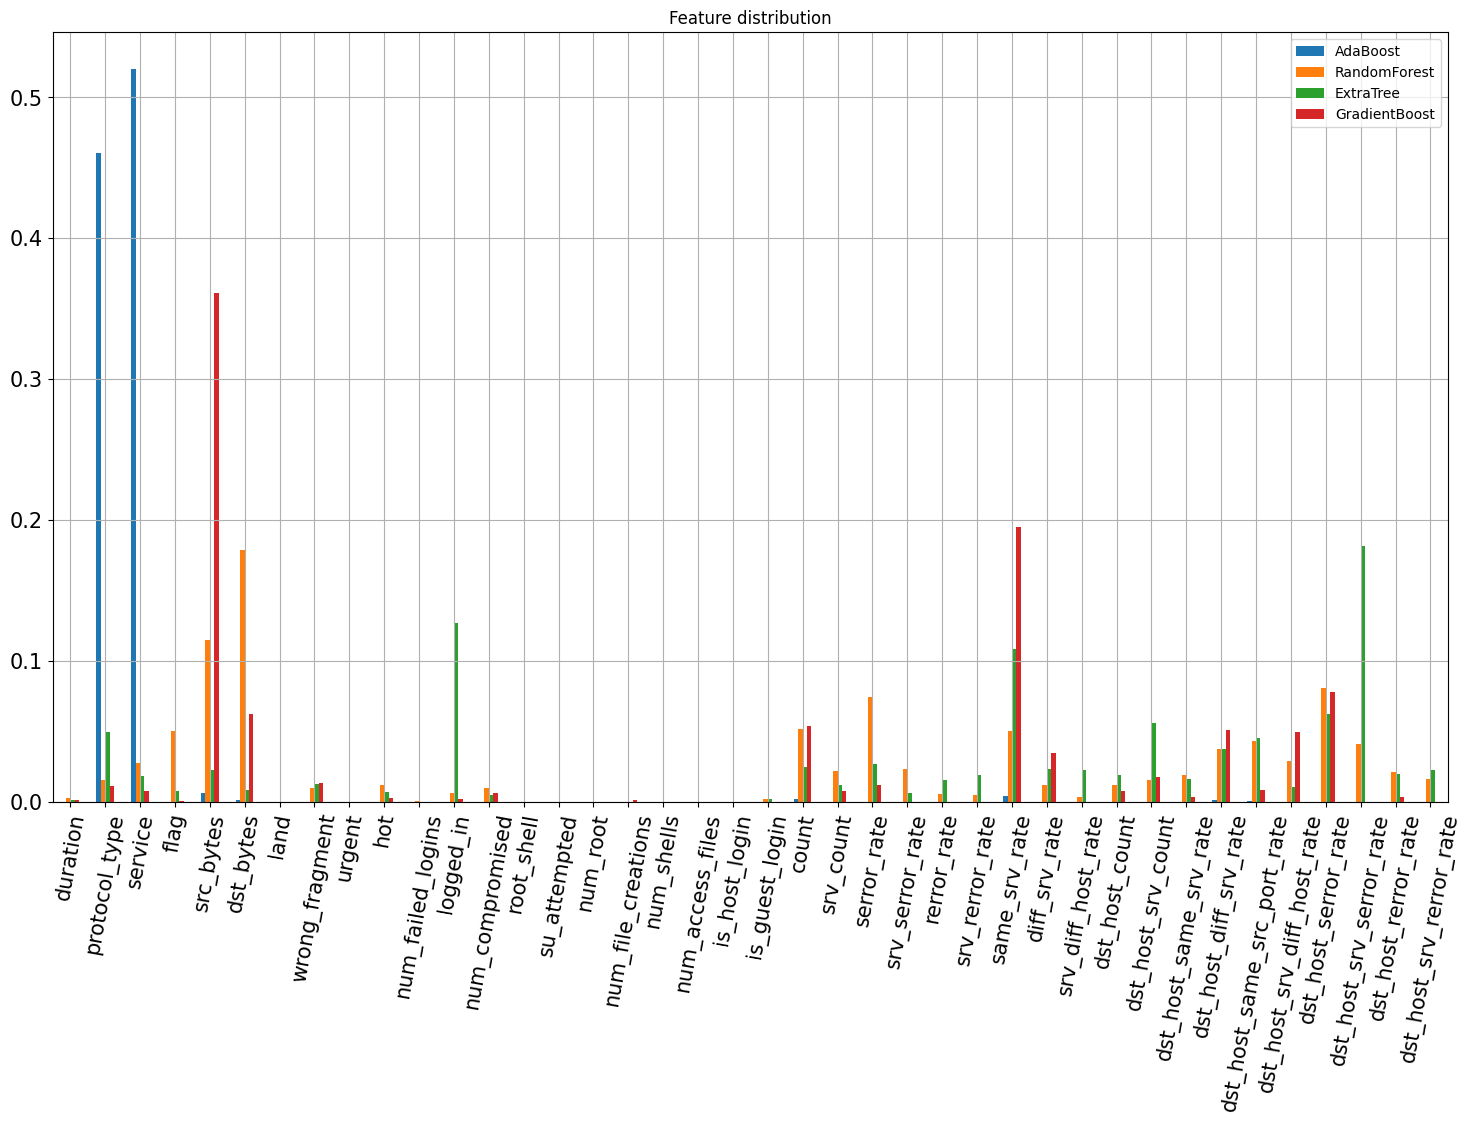

In [45]:
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

graph = feature_df.plot.bar(figsize = (18, 10), title = 'Feature distribution', grid=True, legend=True, fontsize = 15,
                            xticks=feature_df.index)
graph.set_xticklabels(feature_df.features, rotation = 80)

In [46]:
a_f = feature_df.nlargest(12, 'AdaBoost')
e_f = feature_df.nlargest(12, 'ExtraTree')
g_f = feature_df.nlargest(12, 'GradientBoost')
r_f = feature_df.nlargest(12, 'RandomForest')

In [47]:
result = pd.concat([a_f, e_f, g_f, r_f])
result = result.drop_duplicates() # delete duplicate feature
result

,features,AdaBoost,RandomForest,ExtraTree,GradientBoost
2,service,0.520244,0.027640,0.018555,0.007769
1,protocol_type,0.460444,0.015541,0.050011,0.011454
4,src_bytes,0.006690,0.114844,0.022757,0.361432
27,same_srv_rate,0.004400,0.050366,0.108568,0.194912
21,count,0.002364,0.052011,0.024964,0.054406
33,dst_host_diff_srv_rate,0.001809,0.037821,0.037456,0.051029
5,dst_bytes,0.001420,0.178624,0.008725,0.062367
34,dst_host_same_src_port_rate,0.000785,0.043232,0.045819,0.008548
36,dst_host_serror_rate,0.000344,0.080758,0.062540,0.078089
31,dst_host_srv_count,0.000313,0.015603,0.056504,0.017999


In [48]:
selected_features = result['features'].values.tolist()
selected_features

['service',
 'protocol_type',
 'src_bytes',
 'same_srv_rate',
 'count',
 'dst_host_diff_srv_rate',
 'dst_bytes',
 'dst_host_same_src_port_rate',
 'dst_host_serror_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'num_compromised',
 'dst_host_srv_serror_rate',
 'logged_in',
 'serror_rate',
 'diff_srv_rate',
 'dst_host_srv_rerror_rate',
 'dst_host_srv_diff_host_rate',
 'wrong_fragment',
 'flag']

In [ ]:
AB.fit(X_train_stdrop, Y_train)

In [ ]:
ab2_score = AB.score(X_test_stdrop, Y_test)

print('AdaBoostClassifier_stdrop processing ,,,')
print('AdaBoostClasifier Score: %.3f %%' % ab2_score)

In [ ]:
RF.fit(X_train_stdrop, Y_train)

In [ ]:
rf2_score = RF.score(X_test_stdrop, Y_test)

print('RandomForestClassifier_stdrop processing ,,,')
print('RandomForestClassifier Score: %.3f %%' % rf2_score)

In [ ]:
ET.fit(X_train_stdrop, Y_train)

In [ ]:
et2_score = ET.score(X_test_stdrop, Y_test)

print('ExtraTreesClassifier_stdrop processing ,,,')
print('ExtraTreesClassifier Score: %.3f %%' % et2_score)

In [ ]:
GB.fit(X_train_stdrop, Y_train)

In [ ]:
gb2_score = GB.score(X_test_stdrop, Y_test)

print('GradientBoostingClassifier_stdrop processing ,,,')
print('GradientBoostingClassifier Score: %.2f %%' % gb2_score)

In [ ]:
X_train_ens = X_train[selected_features]
X_train_ens.head()

X_test_ens = X_test[selected_features]
X_test_ens.head()

In [ ]:
sample = X_train_ens[:10000]

colormap = plt.cm.viridis
plt.figure(figsize=(20, 20))
sns.heatmap(sample.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)

In [ ]:
selected2 = ['flag', 'dst_host_serror_rate', 'serror_rate']
X_train_cordrop = X_train_ens.drop(selected2, axis=1)
X_train_cordrop.describe()

X_test_cordrop = X_test_ens.drop(selected2, axis=1)
X_test_cordrop.describe()

In [ ]:
AB.fit(X_train_cordrop, Y_train)

In [ ]:
ab_finalscore = AB.score(X_test_cordrop, Y_test)

print('AdaBoostClassifier_final processing ,,,')
print('AdaBoostClassifier_final Score: %.3f %%' % ab_finalscore)

In [ ]:
RF.fit(X_train_cordrop, Y_train)

In [ ]:
rf_finalscore = RF.score(X_test_cordrop, Y_test)

print('RandomForestClassifier_final processing ,,,')
print('RandomForestClassifier_final Score: %.3f %%' % rf_finalscore)

In [ ]:
ET.fit(X_train_cordrop, Y_train)

In [ ]:
et_finalscore = ET.score(X_test_cordrop, Y_test)

print('ExtraTreesClassifier_final processing ,,,')
print('ExtraTreesClassifier_final Score: %.3f %%' % et_finalscore)

In [ ]:
GB.fit(X_train_cordrop, Y_train)

In [ ]:
gb_finalscore = GB.score(X_test_cordrop, Y_test)

print('GradientBoostClassifier_final processing ,,,')
print('GradientBoostClassifier_final Score: %.3f %%' % gb_finalscore)

In [ ]:
LR.fit(X_train_cordrop, Y_train)

In [ ]:
lr_finalscore = LR.score(X_test_cordrop, Y_test)

print('LinearRegression_final processing ,,,')
print('LinearRegression_final Score: %.3f %%' % lr_finalscore)

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
MLP = MLPClassifier(hidden_layer_sizes=(1000, 300, 300), solver='adam', shuffle=False, tol = 0.0001)

In [ ]:
MLP.fit(X_train_cordrop, Y_train)

In [ ]:
mlp_finalscore = MLP.score(X_test_cordrop, Y_test)

print('MLP_final processing ,,,')
print('MLP_final Score: %.3f %%' % mlp_finalscore)

In [ ]:
first_model = {'Model': ['Linear Regression', 'Adaboost', 'RandomForest', 'ExtraTrees', 'GradientBoost'],
               'accuracy' : [lr_score, ab_score, rf_score, et_score, gb_score]}

result_df = pd.DataFrame(data = first_model)
result_df

In [ ]:
r1 = result_df.plot(x='Model', y='accuracy', kind='bar', figsize=(8, 8), grid=True, title='FIRST MODEL ACCURACY', colormap=plt.cm.viridis,
               sort_columns=True)
r1.set_xticklabels(result_df.Model, rotation = 45)

In [ ]:
second_model = {'Model': ['Adaboost', 'RandomForest', 'ExtraTrees', 'GradientBoost'],
               'accuracy' : [ab2_score, rf2_score, et2_score, gb2_score]}

result_df = pd.DataFrame(data = second_model)
result_df

In [ ]:
r2 = result_df.plot(x='Model', y='accuracy', kind='bar', figsize=(8, 8), grid=True, title='SECOND MODEL ACCURACY', colormap=plt.cm.viridis,
               sort_columns=True)
r2.set_xticklabels(result_df.Model, rotation = 45)

In [ ]:
final_model = {'Model': ['Linear Regression', 'Adaboost', 'RandomForest', 'ExtraTrees', 'GradientBoost', 'MLP'],
               'accuracy' : [lr_finalscore, ab_finalscore, rf_finalscore, et_finalscore, gb_finalscore, mlp_finalscore]}

result_df = pd.DataFrame(data = final_model)
result_df

In [ ]:
r3 = result_df.plot(x='Model', y='accuracy', kind='bar', figsize=(8, 8), grid=True, title='FINAL MODEL ACCURACY', colormap=plt.cm.viridis,
               sort_columns=True)
r3.set_xticklabels(result_df.Model, rotation = 45)